In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt #used to avoid a warning message

In [3]:
import pandas as pd
import csv
import os

folder=input("Which is your input folder? ")
os.chdir("./"+folder)

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0]
        rankNum=int(row[1])

Which is your input folder?  prova


In [4]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
       "_total_inventories_","_total_in_progress_inventories_",
       "_total_lost_production_","_total_cost_of_lost_production_","_updatedLabor_","_updatedCapital_"]

In [5]:
# database
data={}
for name in names:
    data[name]=[]
    for k in range(rankNum):
        data[name].append(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

    data[name].append(data[name][0].copy()) #copy of first rank
    for k in range(1,rankNum):   #add others
        data[name][-1]=data[name][-1].add(data[name][k])

'_total_production_, all ranks'

,0,1,2
0,19.243474,20.184697,7.071822
1,35.855034,31.438770,17.180137
2,49.471301,52.802878,11.321182
3,62.230837,49.180583,11.107448
4,62.230837,35.423620,9.439226
...,...,...,...
95,19.581886,23.948401,1.949209
96,25.708489,17.596316,2.013074
97,25.708489,17.600328,4.841529
98,25.708489,24.452378,2.607471


'____________________________________________________________'

'_total_cost_of_production_, all ranks'

,0,1,2
0,37.5,36.0,19.95
1,69.0,57.6,32.55
2,96.0,96.0,21.00
3,120.0,99.6,21.00
4,120.0,75.6,23.10
...,...,...,...
95,108.0,121.2,5.25
96,120.0,109.2,4.20
97,120.0,110.4,13.65
98,120.0,121.2,6.30


'____________________________________________________________'

'_total_cost_of_unused_factors_, all ranks'

,0,1,2
0,114.836772,118.455266,44.841262
1,83.336772,96.855266,32.241262
2,56.336772,58.455266,43.791262
3,32.336772,54.855266,43.791262
4,32.336772,78.855266,41.691262
...,...,...,...
95,44.336772,33.255266,59.541262
96,32.336772,45.255266,60.591262
97,32.336772,44.055266,51.141262
98,32.336772,33.255266,58.491262


'____________________________________________________________'

'_total_inventories_, all ranks'

,0,1,2
0,0.0,0.0,13.65
1,0.0,0.0,46.20
2,0.0,43.2,67.20
3,0.0,172.8,88.20
4,187.5,201.6,106.05
...,...,...,...
95,18562.5,14708.4,541.80
96,18735.0,14736.0,546.00
97,18907.5,14803.2,556.50
98,19080.0,14899.2,561.75


'____________________________________________________________'

'_total_in_progress_inventories_, all ranks'

,0,1,2
0,37.5,36.0,0.0
1,106.5,93.6,0.0
2,202.5,146.4,0.0
3,322.5,94.8,0.0
4,255.0,98.4,0.0
...,...,...,...
95,-11571.0,-7905.6,0.0
96,-11623.5,-8104.8,0.0
97,-11676.0,-8169.6,0.0
98,-11728.5,-8354.4,0.0


'____________________________________________________________'

'_total_lost_production_, all ranks'

,0,1,2
0,0.000000,0.000000,3.317398
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,11.230048,0.000000
4,0.000000,0.000000,2.605808
...,...,...,...
95,0.000000,0.000000,0.000000
96,0.000000,0.000000,0.000000
97,0.000000,0.000000,1.363582
98,0.000000,0.000000,0.331515


'____________________________________________________________'

'_total_cost_of_lost_production_, all ranks'

,0,1,2
0,0.0,0.0,6.30
1,0.0,0.0,0.00
2,0.0,0.0,0.00
3,0.0,21.6,0.00
4,0.0,43.2,5.25
...,...,...,...
95,0.0,0.0,0.00
96,0.0,280.8,0.00
97,0.0,108.0,3.15
98,0.0,210.0,1.05


'____________________________________________________________'

'_updatedLabor_, all ranks'

,0,1,2
0,80,104,55
1,80,104,55
2,80,104,55
3,80,104,55
4,80,104,55
...,...,...,...
95,49,69,29
96,49,69,29
97,49,69,29
98,49,69,29


'____________________________________________________________'

'_updatedCapital_, all ranks'

,0,1,2
0,722.208474,503.744083,97.755708
1,721.051088,502.936801,97.599049
2,719.895558,502.130812,97.442640
3,718.741879,501.326115,97.286482
4,717.590049,500.522708,97.130574
...,...,...,...
95,620.141782,432.552046,83.940304
96,619.147965,431.858854,83.805785
97,618.155740,431.166772,83.671481
98,617.165106,430.475800,83.537392


'____________________________________________________________'

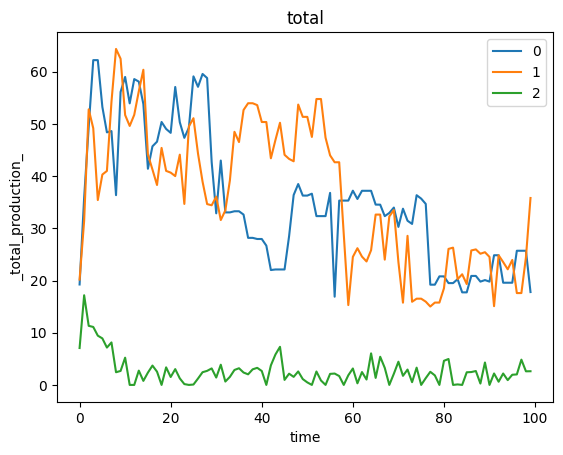

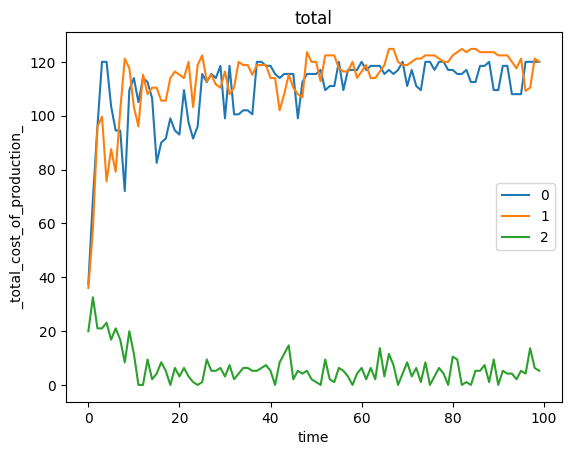

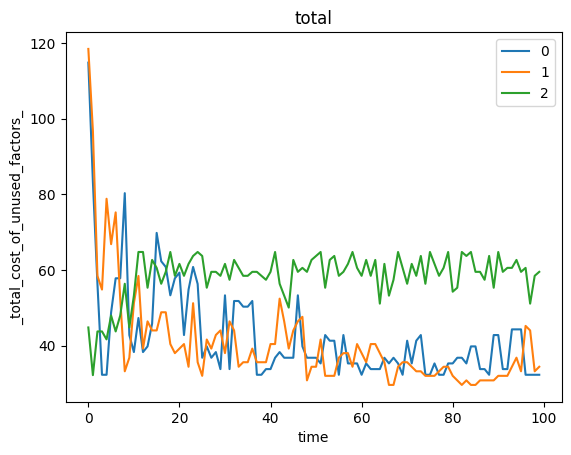

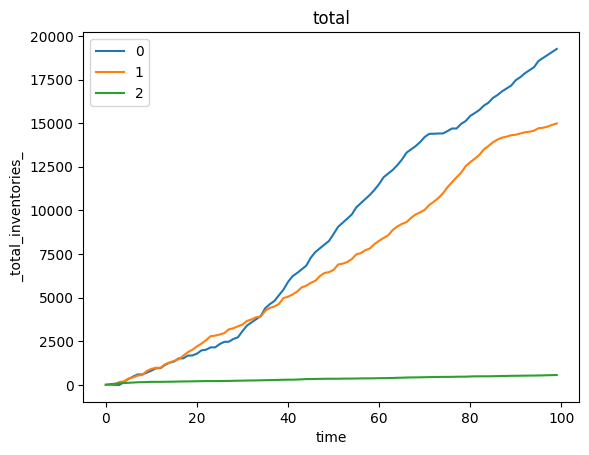

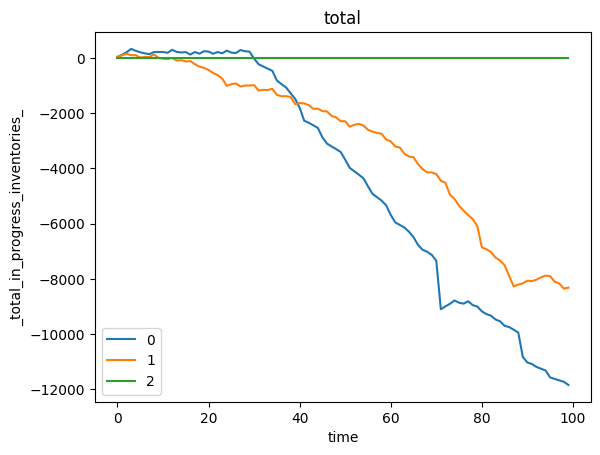

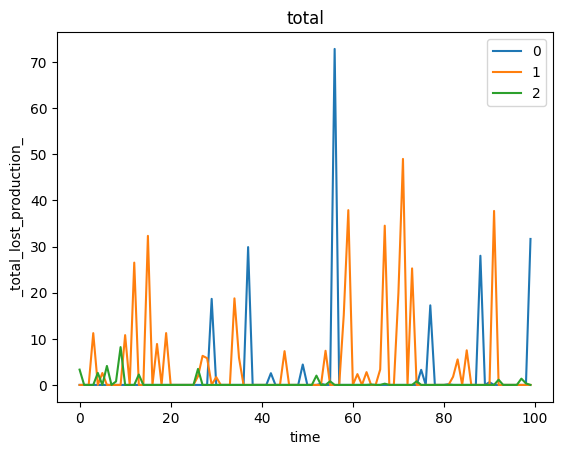

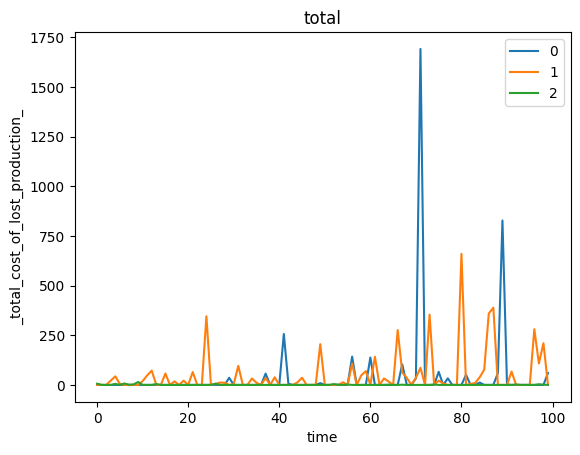

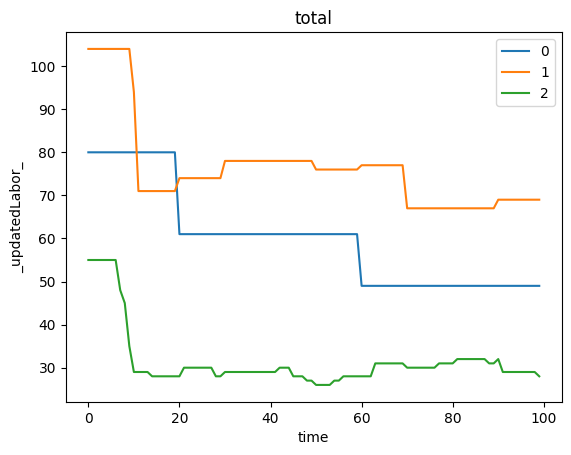

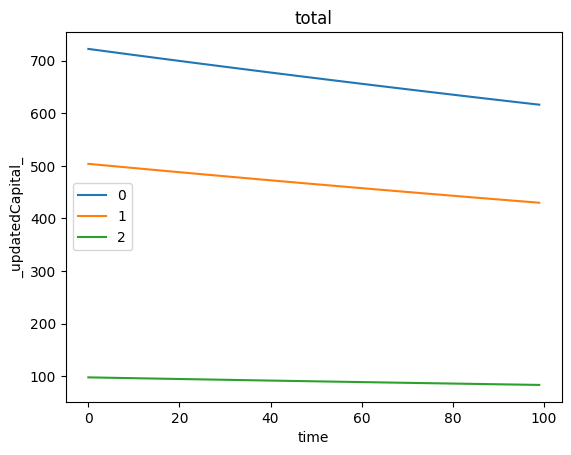

In [6]:
# totals
with plt.rc_context(rc={'figure.max_open_warning': 0}): #to avoid a warning about open plots
    for name in names:
        display(name+", all ranks")
        display(data[name][-1])
        display("____________________________________________________________")
        data[name][-1].plot(title="total",xlabel="time",ylabel=name)